## Sequential Neural Network

In [1]:
import pickle
import numpy as np
import pandas as pd

# Load the training and testing datasets from the saved file
with open('train_test_data.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [2]:
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LeakyReLU


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.2)

In [4]:
x_train.shape

(3841, 8)

In [5]:
y_train.shape

(3841,)

## Scale the features


In [6]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model 1

In [7]:
model=Sequential()
model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\rutik\anaconda\envs\Ruth\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics =['Accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5)

In [10]:
cache =model.fit(x_train, y_train, batch_size=19, 
                 epochs=10,validation_split=0.3, callbacks=[early_stopping])

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.7002 - loss: 0.5804 - val_Accuracy: 0.9141 - val_loss: 0.2209
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9193 - loss: 0.1989 - val_Accuracy: 0.9592 - val_loss: 0.1173
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9608 - loss: 0.1139 - val_Accuracy: 0.9627 - val_loss: 0.1021
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9651 - loss: 0.0890 - val_Accuracy: 0.9644 - val_loss: 0.0866
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9662 - loss: 0.0877 - val_Accuracy: 0.9705 - val_loss: 0.0773
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9706 - loss: 0.0761 - val_Accuracy: 0.9696 - val_loss: 0.0694
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9727 - loss: 0.0656 - val_Accuracy: 0.9757 - val_loss: 0.0683
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9805 - loss: 0.0587 - val_Accuracy: 0.

In [11]:
loss,accuracy = model.evaluate(X,y)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.3670 - loss: 618005120.0000


In [12]:
model.evaluate(x_train,y_train)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.9898 - loss: 0.0289


[0.032604675740003586, 0.9877635836601257]

In [13]:
model.evaluate(x_test,y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.9853 - loss: 0.0406 


[0.037986911833286285, 0.9843912720680237]

# Model 2

In [14]:
# Define the model
model1 = Sequential()
model1.add(Dense(32, input_shape=(8,)))
model1.add(LeakyReLU(alpha=0.1))  # Add LeakyReLU layer with a small slope (alpha)
model1.add(Dense(16))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(8))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(1,activation='sigmoid'))


C:\Users\rutik\anaconda\envs\Ruth\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\rutik\anaconda\envs\Ruth\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training if validation loss doesn't improve for 5 epochs

In [17]:
cache1 = model1.fit(x_train, y_train, batch_size=19, epochs=10, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9210 - loss: 0.4820 - val_accuracy: 0.9124 - val_loss: 0.2579
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9239 - loss: 0.2194 - val_accuracy: 0.9506 - val_loss: 0.1363
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1320 - val_accuracy: 0.9558 - val_loss: 0.1107
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1183 - val_accuracy: 0.9575 - val_loss: 0.1022
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1042 - val_accuracy: 0.9618 - val_loss: 0.0951
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.0896 - val_accuracy: 0.9662 - val_loss: 0.0861
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.0712 - val_accuracy: 0.9705 - val_loss: 0.0771
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.0753 - val_accuracy: 0.

In [18]:
loss,accuracy = model1.evaluate(X,y)

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2905 - loss: 520597312.0000


In [19]:
model1.evaluate(x_test,y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9806 - loss: 0.0592 


[0.060983072966337204, 0.97502601146698]

In [20]:
model1.evaluate(x_train,y_train)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9814 - loss: 0.0498


[0.05466354638338089, 0.9781306982040405]

## Visualization

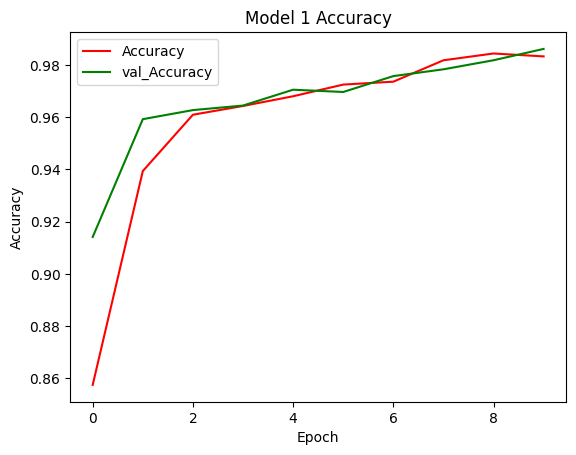

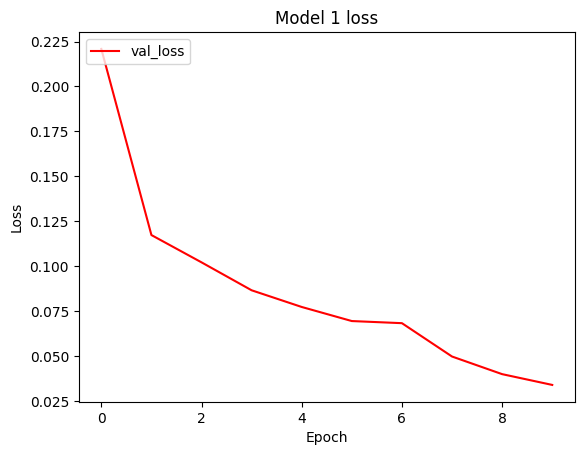

In [21]:
plt.plot(cache.history['Accuracy'],color='red')
plt.plot(cache.history['val_Accuracy' ], color='green')
plt.title("Model 1 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'val_Accuracy'], loc= 'upper left')
plt.show()
#summarize history for loss plt.plot(cache.history['loss'])
plt.plot(cache.history['val_loss'], color='red')
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss'], loc='upper left')
plt.show()

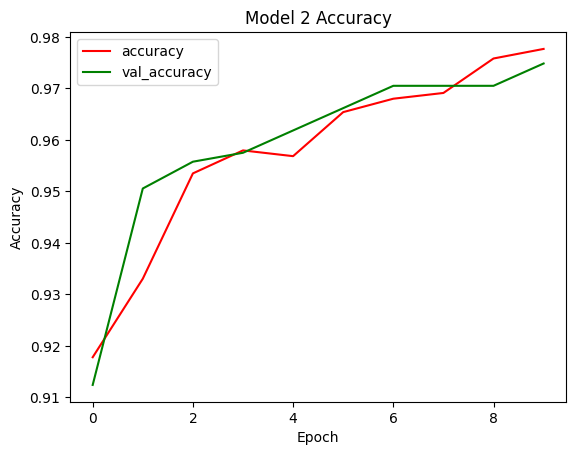

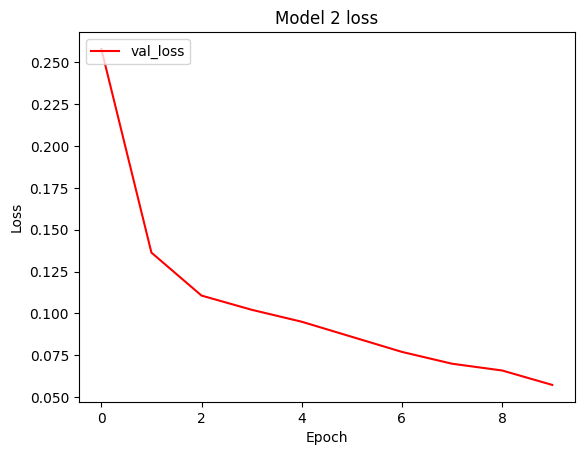

In [22]:
plt.plot(cache1.history['accuracy'], color='red')
plt.plot(cache1.history['val_accuracy' ], color='green')
plt.title("Model 2 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc= 'upper left')
plt.show()
#summarize history for loss plt.plot(cache.history['loss'])
plt.plot(cache1.history['val_loss'], color='red')
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss'], loc='upper left')
plt.show()